In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
capture = cv.VideoCapture("MotionTracking_Video1.mp4")

In [25]:
print(capture.get(cv.CAP_PROP_FRAME_COUNT))
print(capture.get(cv.CAP_PROP_FRAME_WIDTH))
print(capture.get(cv.CAP_PROP_FRAME_HEIGHT))

246.0
1920.0
1080.0


In [3]:
ret, frame = capture.read()

In [4]:
# Read the Background Image
Background = cv.imread("MotionTracking_Background.jpg")
Background = cv.resize(Background, (frame.shape[1], frame.shape[0]))

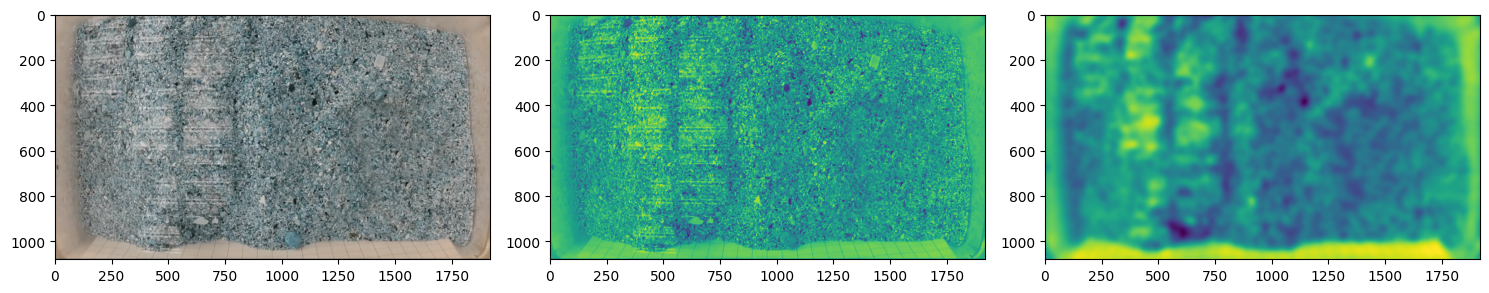

In [29]:
# Convert he Background image to grayscale and blur it
grayBackground = cv.cvtColor(Background, cv.COLOR_RGB2GRAY)
grayBackgroundBlur = cv.GaussianBlur(grayBackground, (95,95),0)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8)) 
ax = [ax1, ax2, ax3]

ax[0].imshow(Background)
ax[1].imshow(grayBackground)
ax[2].imshow(grayBackgroundBlur)

plt.tight_layout()
plt.show()

In [29]:
# Another way of showing the image, good if running in shell
#cv.imshow("image", frame)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [20]:
# We start with frame number 100
capture.set(cv.CAP_PROP_POS_FRAMES, 1)
capture.get(cv.CAP_PROP_POS_FRAMES)

1.0

In [21]:
# Read the first image
ret, FirstImage = capture.read()

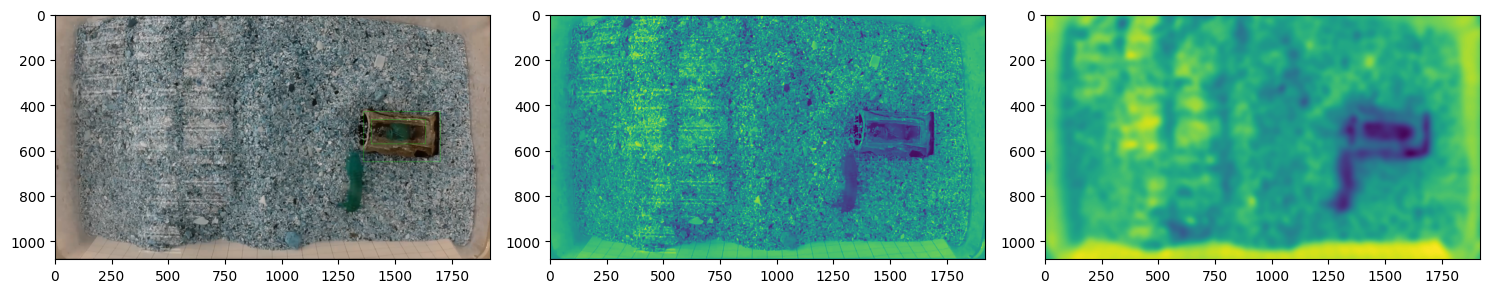

In [30]:
gray1 = cv.cvtColor(FirstImage, cv.COLOR_RGB2GRAY)
gray1Blur = cv.GaussianBlur(gray1, (95,95),0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8)) 
ax = [ax1, ax2, ax3]

ax[0].imshow(FirstImage)
ax[1].imshow(gray1)
ax[2].imshow(gray1Blur)

plt.tight_layout()
plt.show()

In [36]:
delta = cv.absdiff(grayBackgroundBlur, gray1Blur)
threshold = cv.threshold(delta, 70, 255, cv.THRESH_BINARY)[1]

In [34]:
delta

array([[ 9,  8,  9, ...,  9, 10,  9],
       [ 8,  9,  9, ..., 10, 10,  9],
       [ 8,  9,  9, ...,  9, 10,  9],
       ...,
       [10, 10, 10, ..., 11, 11, 11],
       [10, 11, 10, ..., 11, 12, 11],
       [10, 10, 10, ..., 11, 12, 11]], dtype=uint8)

In [35]:
threshold

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
(contours, _) = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for contour in contours:
    if cv.contourArea(contour)<5000:
        continue
    (x, y, w, h) = cv.boundingRect(contour)
    cv.rectangle(FirstImage, (x,y), (x+w, y+h), (0,255,0), 1)

In [26]:
contours[0]

array([[[1290,  870]],

       [[1290,  871]],

       [[1291,  870]]], dtype=int32)

In [27]:
contours

(array([[[1290,  870]],
 
        [[1290,  871]],
 
        [[1291,  870]]], dtype=int32),
 array([[[1247,  820]],
 
        [[1246,  821]],
 
        [[1245,  821]],
 
        [[1243,  823]],
 
        [[1243,  826]],
 
        [[1246,  829]],
 
        [[1246,  830]],
 
        [[1247,  831]],
 
        [[1241,  837]],
 
        [[1240,  837]],
 
        [[1240,  838]],
 
        [[1239,  839]],
 
        [[1239,  843]],
 
        [[1240,  844]],
 
        [[1240,  847]],
 
        [[1241,  848]],
 
        [[1241,  849]],
 
        [[1242,  850]],
 
        [[1242,  851]],
 
        [[1244,  851]],
 
        [[1245,  852]],
 
        [[1247,  852]],
 
        [[1248,  851]],
 
        [[1250,  851]],
 
        [[1251,  850]],
 
        [[1252,  850]],
 
        [[1253,  849]],
 
        [[1254,  849]],
 
        [[1255,  848]],
 
        [[1255,  847]],
 
        [[1256,  846]],
 
        [[1256,  843]],
 
        [[1257,  842]],
 
        [[1257,  838]],
 
        [[1254,  835]],
 

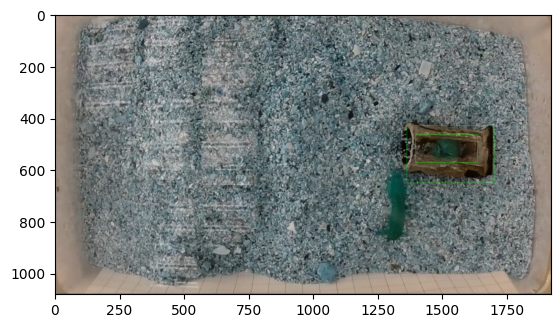

In [37]:
plt.imshow(FirstImage)

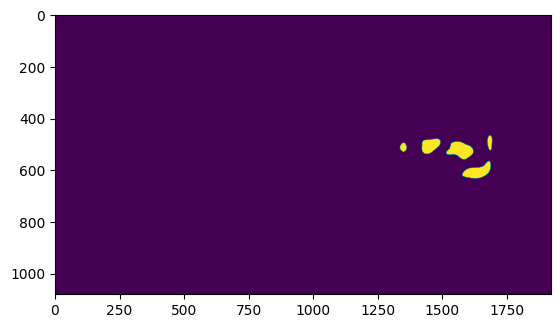

In [38]:
plt.imshow(threshold)

In [39]:
threshold.shape

(1080, 1920)

In [40]:
frame.shape

(1080, 1920, 3)

In [45]:
np.max(delta)

140